In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'/home/zack'

In [3]:
train = pd.read_csv('projects/kaggle/house_prices/train.csv')
test = pd.read_csv('projects/kaggle/house_prices/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df = pd.concat([train, test], axis=0).set_index('Id')

## Feature Engineering

In [6]:
from sklearn.preprocessing import minmax_scale, normalize

In [7]:
cols = []

### MSSubClass
Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [8]:
df['MSSubClass'].value_counts(dropna=False)

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [9]:
df['MSSubClass_OneStory'] = df['MSSubClass'].apply(lambda x: 1 if x in [20, 30, 40, 120] else 0)
df['MSSubClass_OneHalfStory'] = df['MSSubClass'].apply(lambda x: 1 if x in [40, 50, 150] else 0)
df['MSSubClass_TwoStory'] = df['MSSubClass'].apply(lambda x: 1 if x in [60, 70, 160] else 0)
df['MSSubClass_TwoHalfStory'] = df['MSSubClass'].apply(lambda x: 1 if x in [75] else 0)
df['MSSubClass_1945'] = df['MSSubClass'].apply(lambda x: 1 if x in [30, 70] else 0)
df['MSSubClass_1946'] = df['MSSubClass'].apply(lambda x: 1 if x in [20, 60, 120, 160] else 0)
df['MSSubClass_PUD'] = df['MSSubClass'].apply(lambda x: 1 if x in [150, 160] else 0)
df['MSSubClass_Duplex'] = df['MSSubClass'].apply(lambda x: 1 if x in [90] else 0)
df['MSSubClass_Split'] = df['MSSubClass'].apply(lambda x: 1 if x in [80, 85, 180] else 0)

In [10]:
cols += ['MSSubClass_OneStory', 'MSSubClass_OneHalfStory',
             'MSSubClass_TwoStory', 'MSSubClass_TwoHalfStory', 
             'MSSubClass_1945', 'MSSubClass_1946', 'MSSubClass_PUD',
             'MSSubClass_Duplex', 'MSSubClass_Split']

### MSZoning
Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [11]:
df['MSZoning'].value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [12]:
dummies = pd.get_dummies(df['MSZoning'], prefix='MSZoning')
df = pd.concat([df, dummies], axis=1)

In [13]:
cols += list(dummies.columns)

### LotFrontage
Linear feet of street connected to property

In [14]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

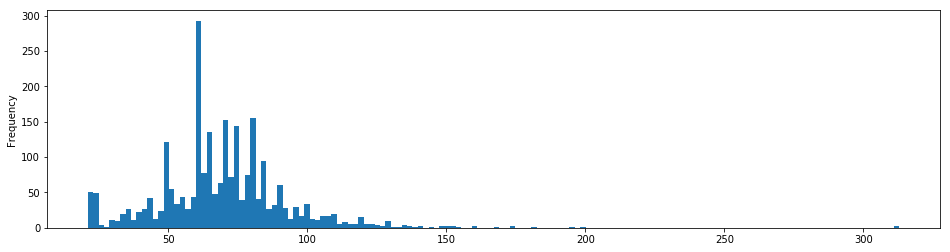

In [15]:
df['LotFrontage'].plot(kind='hist', bins=150, figsize=(16, 4))

In [16]:
df['LotFrontage_minmax'] = minmax_scale(df['LotFrontage'].fillna(0))

In [17]:
cols.append('LotFrontage_minmax')

### LotArea
Lot size in square feet

In [18]:
df['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

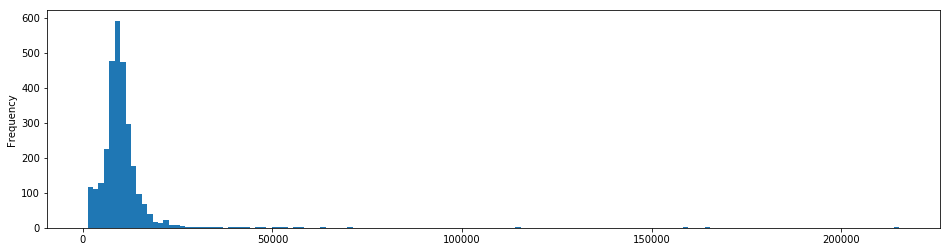

In [19]:
df['LotArea'].plot(kind='hist', bins=150, figsize=(16, 4))

In [20]:
df['LotArea_minmax'] = minmax_scale(df['LotArea'].astype(float))

In [21]:
cols.append('LotArea_minmax')

### Street
Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [22]:
df['Street'].value_counts(dropna=False)

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [23]:
df['StreetPave'] = df['Street'].apply(lambda x: 1 if x == 'Paved' else 0)

In [24]:
cols.append('StreetPave')

### Alley
Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [25]:
df['Alley'].value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [26]:
dummies = pd.get_dummies(df['Alley'], prefix='Alley')
df = pd.concat([df, dummies], axis=1)

In [27]:
cols += list(dummies.columns)

### LotShape
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [28]:
LotShapeLvl = df['LotShape'].map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
LotShapeLvl.value_counts(dropna=False)

0    1859
1     968
2      76
3      16
Name: LotShape, dtype: int64

In [29]:
df['LotShape_minmax'] = minmax_scale(LotShapeLvl.astype(float))

In [30]:
cols.append('LotShape_minmax')

### LandContour
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [31]:
df['LandContour'].value_counts(dropna=False)

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [32]:
dummies = pd.get_dummies(df['LandContour'], prefix='LandContour')
df = pd.concat([df, dummies], axis=1)

In [33]:
cols += list(dummies.columns)

### Utilities
Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [34]:
df['Utilities'].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [35]:
df['UtilitiesNoSeWa'] = df['Utilities'].apply(lambda x: 1 if x == 'NoSeWa' else 0)
df['UtilitiesNan'] = df['Utilities'].isnull().astype(int)

In [36]:
cols += ['UtilitiesNoSeWa', 'UtilitiesNan']

### LotConfig
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [37]:
df['LotConfig'].value_counts(dropna=False)

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [38]:
dummies = pd.get_dummies(df['LotConfig'], prefix='LotConfig')
df = pd.concat([df, dummies], axis=1)

In [39]:
cols += list(dummies.columns)

### LandSlope
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [40]:
df['LandSlope'].value_counts(dropna=False)

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [41]:
LandSlopeLvl = df['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
df['LandSlope_minmax'] = minmax_scale(LandSlopeLvl.astype(float))

In [42]:
cols.append('LandSlope_minmax')

### Neighborhood
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [43]:
df['Neighborhood'].value_counts(dropna=False)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [44]:
dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')
df = pd.concat([df, dummies], axis=1)

In [45]:
cols += list(dummies.columns)

### Condition1
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [46]:
df['Condition1'].value_counts(dropna=False)

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [47]:
dummies = pd.get_dummies(df['Condition1'], prefix='Condition1')
df = pd.concat([df, dummies], axis=1)

In [48]:
cols += list(dummies.columns)

### Condition2
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [49]:
df['Condition2'].value_counts(dropna=False)

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [50]:
dummies = pd.get_dummies(df['Condition2'], prefix='Condition2')
df = pd.concat([df, dummies], axis=1)

In [51]:
cols += list(dummies.columns)

### BldgType
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [52]:
df['BldgType'].value_counts(dropna=False)

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [53]:
dummies = pd.get_dummies(df['BldgType'], prefix='BldgType')
df = pd.concat([df, dummies], axis=1)

In [54]:
cols += list(dummies)

### HouseStyle
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [55]:
df['HouseStyle'].value_counts(dropna=False)

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [56]:
dummies = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle')
df = pd.concat([df, dummies], axis=1)

In [57]:
cols += list(dummies.columns)

### OverallQual
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [58]:
df['OverallQual'].value_counts(dropna=False)

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

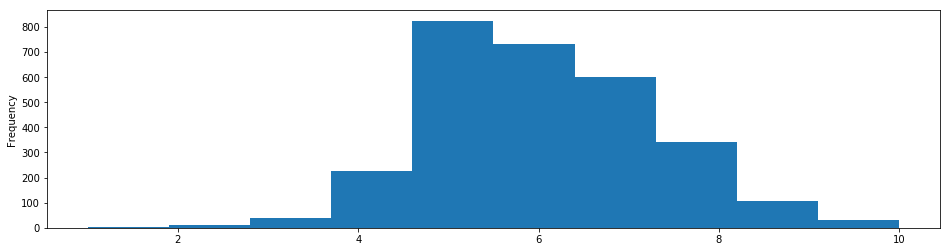

In [59]:
df['OverallQual'].plot(kind='hist', bins = 10, figsize=(16, 4))

In [60]:
df['OverallQual_minmax'] = minmax_scale(df['OverallQual'].astype(float))

In [61]:
cols.append('OverallQual_minmax')

### OverallCond
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [62]:
df['OverallCond'].value_counts(dropna=False)

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

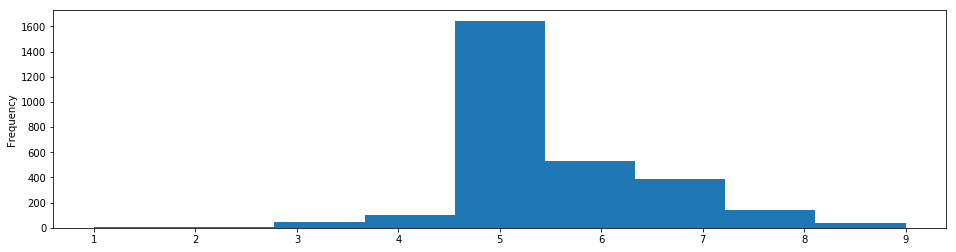

In [63]:
df['OverallCond'].plot(kind='hist', bins=9, figsize=(16, 4))

In [64]:
df['OverallCond_minmax'] = minmax_scale(df['OverallCond'].astype(float))

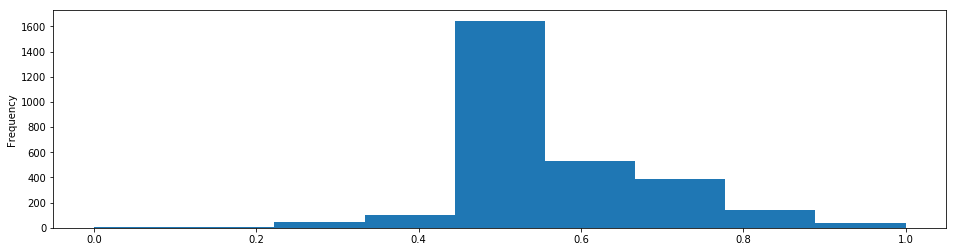

In [65]:
df['OverallCond_minmax'].plot(kind='hist', bins=9, figsize=(16, 4))

In [66]:
cols.append('OverallCond_minmax')

### YearBuilt
Original construction date

In [67]:
df['YearBuilt'].describe()

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

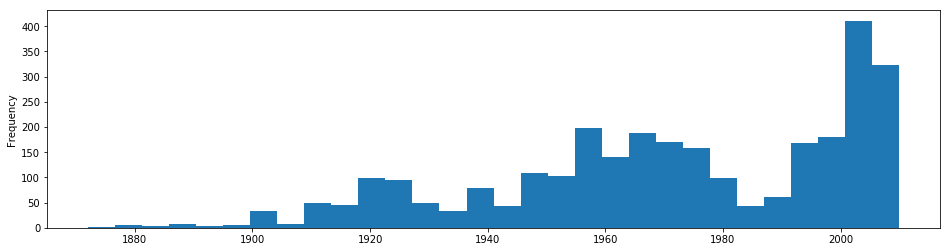

In [68]:
df['YearBuilt'].plot(kind='hist', bins=30, figsize=(16, 4))

In [69]:
df['YearBuilt_minmax'] = minmax_scale(df['YearBuilt'].astype(float))

In [70]:
cols.append('YearBuilt_minmax')

### YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

In [71]:
df['YearRemodAdd'].describe()

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [72]:
df['YearRemodAdd_minmax'] = minmax_scale(df['YearRemodAdd'].astype(float))

In [73]:
cols.append('YearRemodAdd_minmax')

### RoofStyle
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		

In [74]:
df['RoofStyle'].value_counts(dropna=False)

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [75]:
dummies = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle')
df = pd.concat([df, dummies], axis=1)

In [76]:
cols += list(dummies.columns)

### RoofMatl
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		

In [77]:
df['RoofMatl'].value_counts(dropna=False)

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [78]:
dummies = pd.get_dummies(df['RoofMatl'], prefix='RoofMatl')
df = pd.concat([df, dummies], axis=1)

In [79]:
cols += list(dummies.columns)

### Exterior1st
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

In [80]:
df['Exterior1st'].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [81]:
dummies = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st')
df = pd.concat([df, dummies], axis=1)

In [82]:
cols += list(dummies.columns)

### Exterior2nd
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

In [83]:
df['Exterior2nd'].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [84]:
dummies = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd')
df = pd.concat([df, dummies], axis=1)

In [85]:
cols += list(dummies)

### MasVnrType
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

In [86]:
df['MasVnrType'].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [87]:
dummies = pd.get_dummies(df['MasVnrType'], prefix='MasVnrType')
df = pd.concat([df, dummies], axis=1)

In [88]:
cols += list(dummies.columns)

### MasVnrArea
Masonry veneer area in square feet

In [89]:
MasVnrAreaIgnr0 = df['MasVnrArea'].apply(lambda x: x if x else np.nan)
MasVnrAreaIgnr0.describe()

count    1158.000000
mean      255.591537
std       203.057378
min         1.000000
25%       120.000000
50%       202.500000
75%       326.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

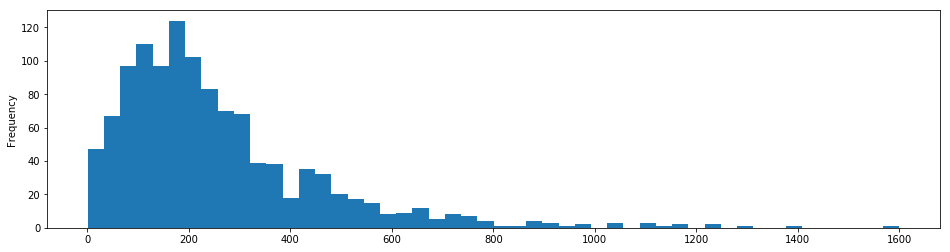

In [90]:
MasVnrAreaIgnr0.plot(kind='hist', bins=50, figsize=(16, 4))

In [91]:
df['MasVnrArea_minmax'] = minmax_scale(df['MasVnrArea'].fillna(0).astype(float))

In [92]:
cols.append('MasVnrArea_minmax')

### ExterQual
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [93]:
df['ExterQual'].value_counts(dropna=False)

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [94]:
df['ExterQualLvl'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [95]:
cols.append('ExterQualLvl')

### ExterCond
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [96]:
df['ExterCond'].value_counts(dropna=False)

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [97]:
dummies = pd.get_dummies(df['ExterCond'], prefix='ExterCond')
df = pd.concat([df, dummies], axis=1)

In [98]:
cols += list(dummies.columns)

### Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		

In [99]:
df['Foundation'].value_counts(dropna=False)

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [100]:
dummies = pd.get_dummies(df['Foundation'], prefix='Foundation')
df = pd.concat([df, dummies], axis=1)

In [101]:
cols += list(dummies.columns)

### BsmtQual
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		

In [102]:
df['BsmtQual'].value_counts(dropna=False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

In [103]:
df['BsmtQualLvl'] = df['BsmtQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)

In [104]:
cols.append('BsmtQualLvl')

### BsmtCond
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	

In [105]:
df['BsmtCond'].value_counts(dropna=False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

In [106]:
df['BsmtCondLvl'] = df['BsmtCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)

In [107]:
cols.append('BsmtCondLvl')

### BsmtExposure
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	

In [108]:
df['BsmtExposure'].value_counts(dropna=False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [109]:
df['BsmtExposureLvl'] = df['BsmtExposure'].map({'No':1, 'Mn':2, 'Av':3, 'Gd':4}).fillna(0)

In [110]:
cols.append('BsmtExposureLvl')

### BsmtFinType1
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

In [111]:
df['BsmtFinType1'].value_counts(dropna=False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

In [112]:
df['BsmtFinType1Lvl']= df['BsmtFinType1'].map({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}).fillna(0)

In [113]:
cols.append('BsmtFinType1Lvl')

### BsmtFinSF1
Type 1 finished square feet

In [114]:
df['BsmtFinSF1Ignr0'] = df['BsmtFinSF1'].apply(lambda x: x if x else np.nan)
df['BsmtFinSF1Ignr0'].describe()

count    1989.000000
mean      647.598291
std       413.520191
min         2.000000
25%       352.000000
50%       601.000000
75%       872.000000
max      5644.000000
Name: BsmtFinSF1Ignr0, dtype: float64

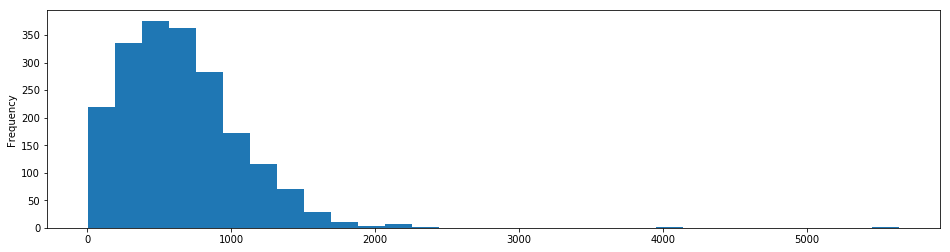

In [115]:
df['BsmtFinSF1Ignr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [116]:
df['BsmtFinSF1_minmax'] = minmax_scale(df['BsmtFinSF1'].fillna(0).astype(float))

In [117]:
cols.append('BsmtFinSF1_minmax')

### BsmtFinType2
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [118]:
df['BsmtFinType2'].value_counts(dropna=False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [119]:
df['BsmtFinType2Lvl'] = df['BsmtFinType2'].map({'Unf': 1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}).fillna(0)

In [120]:
cols.append('BsmtFinType2Lvl')

### BsmtFinSF2
Type 2 finished square feet

In [124]:
df['BsmtFinSF2'].describe()

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [121]:
df['BsmtFinSF2Ignr0'] = df['BsmtFinSF2'].apply(lambda x: x if x else np.nan)
df['BsmtFinSF2Ignr0'].describe()

count     347.000000
mean      416.948127
std       296.240505
min         6.000000
25%       173.500000
50%       354.000000
75%       598.000000
max      1526.000000
Name: BsmtFinSF2Ignr0, dtype: float64

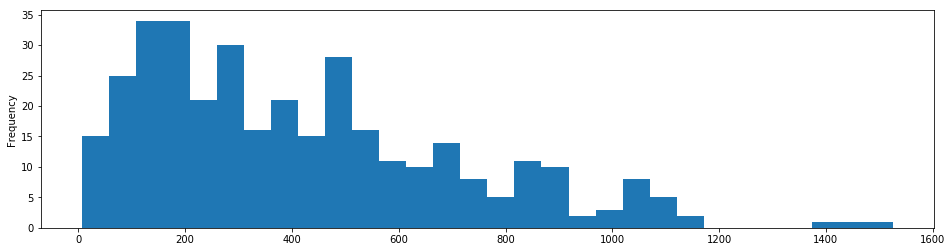

In [122]:
df['BsmtFinSF2Ignr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [126]:
df['BsmtFinSF2_minmax'] = minmax_scale(df['BsmtFinSF2'].fillna(0).astype(float))

In [127]:
cols.append('BsmtFinSF2_minmax')

### BsmtUnfSF
Unfinished square feet of basement area

In [131]:
df['BsmtUnfSF'].describe()

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [128]:
df['BsmtUnfSFIgnr0'] = df['BsmtUnfSF'].apply(lambda x: x if x else np.nan)
df['BsmtUnfSFIgnr0'].describe()

count    2677.000000
mean      611.256257
std       423.943122
min        14.000000
25%       280.000000
50%       520.000000
75%       835.000000
max      2336.000000
Name: BsmtUnfSFIgnr0, dtype: float64

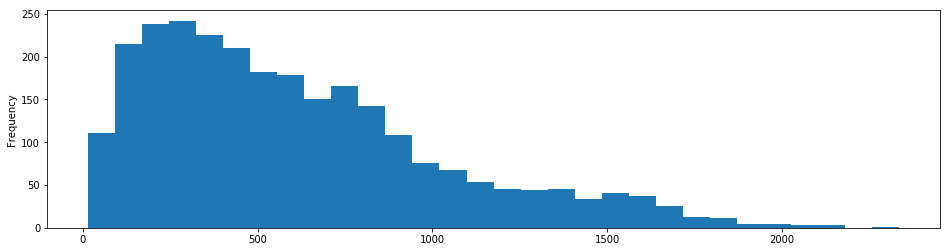

In [129]:
df['BsmtUnfSFIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [133]:
df['BsmtUnfSF_minmax'] = minmax_scale(df['BsmtUnfSF'].fillna(0).astype(float))

In [134]:
cols.append('BsmtUnfSF_minmax')

### TotalBsmtSF
Total square feet of basement area

In [135]:
df['TotalBsmtSFIgnr0'] = df['TotalBsmtSF'].apply(lambda x: x if x else np.nan)
df['TotalBsmtSFIgnr0'].describe()

count    2840.000000
mean     1080.664437
std       410.346812
min       105.000000
25%       811.750000
50%      1004.000000
75%      1313.000000
max      6110.000000
Name: TotalBsmtSFIgnr0, dtype: float64

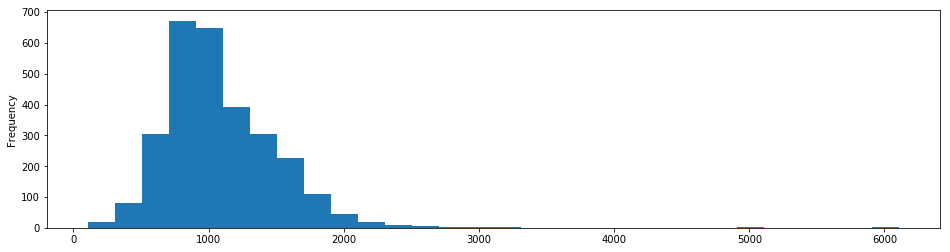

In [136]:
df['TotalBsmtSFIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [149]:
df['TotalBsmtSF_minmax'] = minmax_scale(df['TotalBsmtSF'].fillna(0).astype(float))

In [150]:
with pd.option_context("display.max_columns", 80):
    print(test[test['TotalBsmtSF'].isnull()])

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  Low

In [151]:
cols.append('TotalBsmtSF_minmax')

### Heating
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		

In [152]:
df['Heating'].value_counts(dropna=False)

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [153]:
dummies = pd.get_dummies(df['Heating'], prefix='Heating')
df = pd.concat([df, dummies], axis=1)

In [155]:
cols += list(dummies.columns)

### HeatingQC
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [156]:
df['HeatingQC'].value_counts(dropna=False)

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [157]:
df['HeatingQCLvl'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [158]:
cols.append('HeatingQCLvl')

### CentralAir
Central air conditioning

       N	No
       Y	Yes
		

In [159]:
df['CentralAir'].value_counts(dropna=False)

Y    2723
N     196
Name: CentralAir, dtype: int64

In [160]:
df['CentralAirType'] = df['CentralAir'].map({'Y':1, 'N':0})

In [161]:
cols.append('CentralAirType')

### Electrical
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

In [162]:
df['Electrical'].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [163]:
dummies = pd.get_dummies(df['Electrical'], prefix='Electrical')
df = pd.concat([df, dummies], axis=1)

In [165]:
cols += list(dummies.columns)

### 1stFlrSF
First Floor square feet
 

In [166]:
df['1stFlrSF'].describe()

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

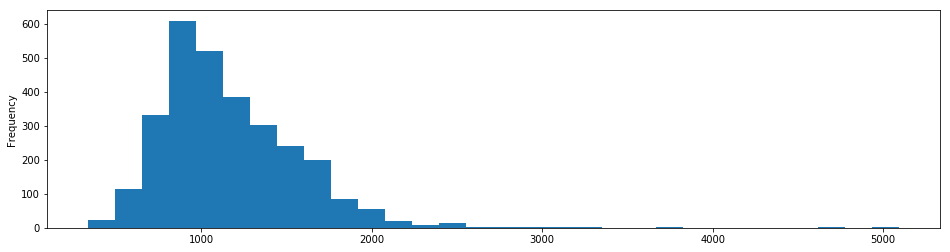

In [167]:
df['1stFlrSF'].plot(kind='hist', bins=30, figsize=(16, 4))

In [168]:
df['1stFlrSF_minmax'] = minmax_scale(df['1stFlrSF'].astype(float))

In [169]:
cols.append('1stFlrSF_minmax')

### 2ndFlrSF
Second floor square feet

In [170]:
df['2ndFlrSFIgnr0'] = df['2ndFlrSF'].apply(lambda x: x if x else np.nan)
df['2ndFlrSFIgnr0'].describe()

count    1251.000000
mean      785.128697
std       276.589449
min       110.000000
25%       600.000000
50%       752.000000
75%       912.000000
max      2065.000000
Name: 2ndFlrSFIgnr0, dtype: float64

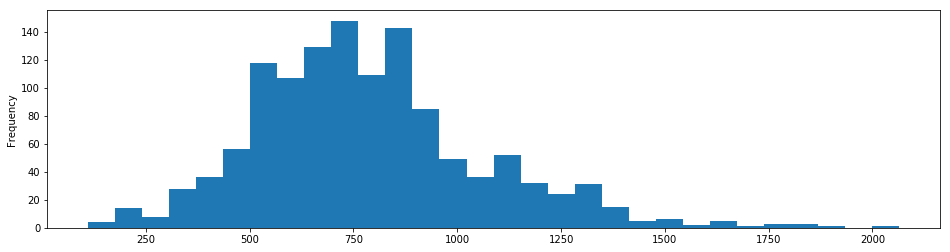

In [171]:
df['2ndFlrSFIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [172]:
df['2ndFlrSF_minmax'] = minmax_scale(df['2ndFlrSF'].astype(float))

In [173]:
cols.append('2ndFlrSF_minmax')

### LowQualFinSF
Low quality finished square feet (all floors)

In [174]:
df['LowQualFinSFIgnr0'] = df['LowQualFinSF'].apply(lambda x: x if x else np.nan)
df['LowQualFinSFIgnr0'].describe()

count      40.000000
mean      342.575000
std       205.781797
min        53.000000
25%       153.000000
50%       366.500000
75%       474.500000
max      1064.000000
Name: LowQualFinSFIgnr0, dtype: float64

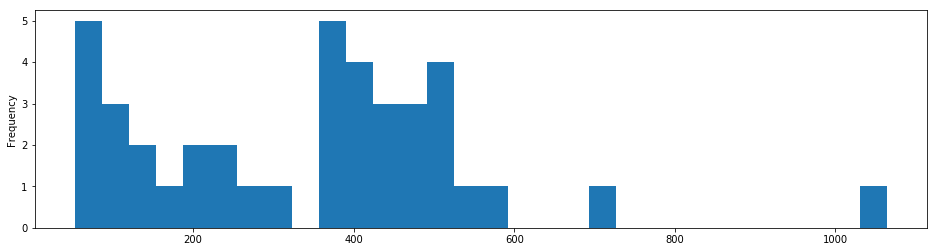

In [175]:
df['LowQualFinSFIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [176]:
df['LowQualFinSF_minmax'] = minmax_scale(df['LowQualFinSF'].astype(float))

In [177]:
cols.append('LowQualFinSF_minmax')

### GrLivArea
Above grade (ground) living area square feet

In [178]:
df['GrLivArea'].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

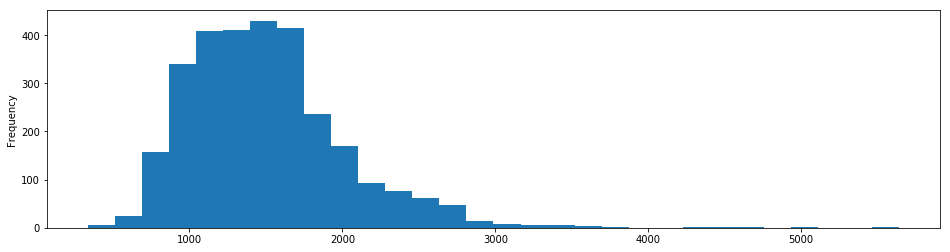

In [179]:
df['GrLivArea'].plot(kind='hist', bins=30, figsize=(16, 4))

In [180]:
df['GrLivArea_minmax'] = minmax_scale(df['GrLivArea'].astype(float))

In [181]:
cols.append('GrLivArea_minmax')

### BsmtFullBath
Basement full bathrooms

In [182]:
df['BsmtFullBath'].value_counts(dropna=False)

 0.0    1705
 1.0    1172
 2.0      38
NaN        2
 3.0       2
Name: BsmtFullBath, dtype: int64

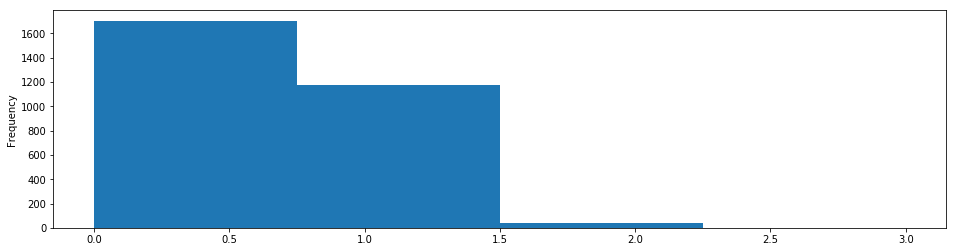

In [183]:
df['BsmtFullBath'].plot(kind='hist', bins=4, figsize=(16, 4))

In [184]:
df['BsmtFullBath_minmax'] = minmax_scale(df['BsmtFullBath'].fillna(0).astype(float))

In [185]:
cols.append('BsmtFullBath_minmax')

### BsmtHalfBath
Basement half bathrooms

In [186]:
df['BsmtHalfBath'].value_counts(dropna=False)

 0.0    2742
 1.0     171
 2.0       4
NaN        2
Name: BsmtHalfBath, dtype: int64

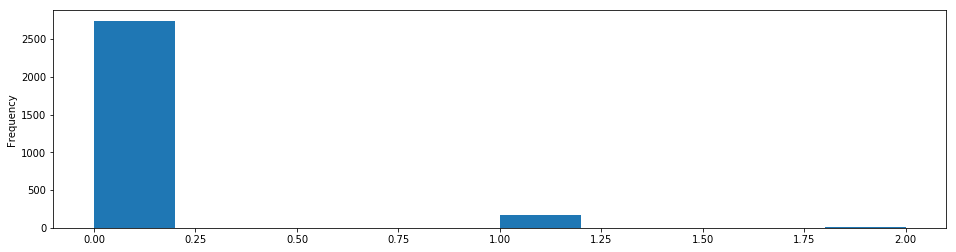

In [187]:
df['BsmtHalfBath'].plot(kind='hist', figsize=(16, 4))

In [188]:
df['BsmtHalfBath_minmax'] = minmax_scale(df['BsmtHalfBath'].fillna(0).astype(float))

In [189]:
cols.append('BsmtHalfBath_minmax')

### FullBath
Full bathrooms above grade

In [190]:
df['FullBath'].value_counts(dropna=False)

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

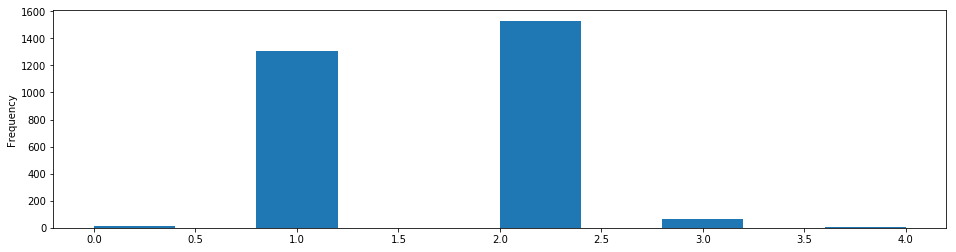

In [191]:
df['FullBath'].plot(kind='hist', figsize=(16, 4))

In [192]:
cols.append('FullBath')

### HalfBath
Half baths above grade

In [193]:
df['HalfBath'].value_counts(dropna=False)

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

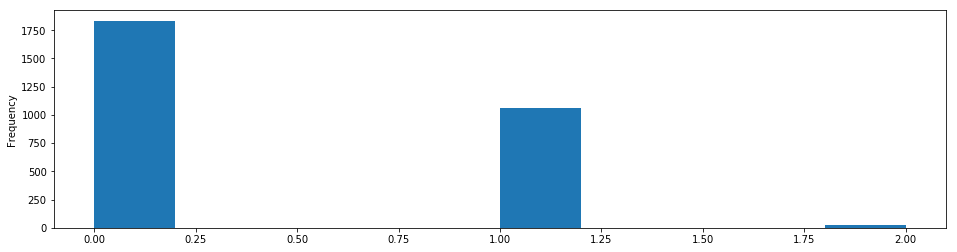

In [194]:
df['HalfBath'].plot(kind='hist', figsize=(16, 4))

In [195]:
cols.append('HalfBath')

### Bedroom
Bedrooms above grade (does NOT include basement bedrooms)

In [196]:
df['BedroomAbvGr'].value_counts(dropna=False)

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

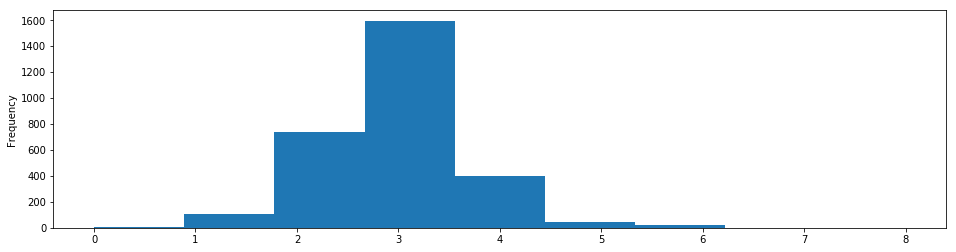

In [197]:
df['BedroomAbvGr'].plot(kind='hist', bins=9, figsize=(16, 4))

In [198]:
cols.append('BedroomAbvGr')

### Kitchen
Kitchens above grade

In [199]:
df['KitchenAbvGr'].value_counts(dropna=False)

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

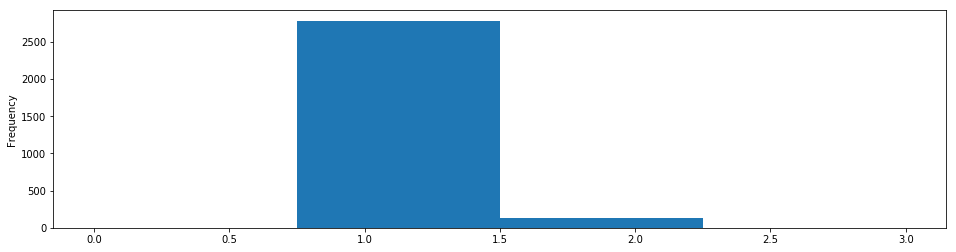

In [200]:
df['KitchenAbvGr'].plot(kind='hist', bins=4, figsize=(16, 4))

In [201]:
cols.append('KitchenAbvGr')

### KitchenQual
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

In [202]:
df['KitchenQual'].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [203]:
df['KitchenQualLvl'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)

In [204]:
cols.append('KitchenQualLvl')

### TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

In [205]:
df['TotRmsAbvGrd'].describe()

count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64

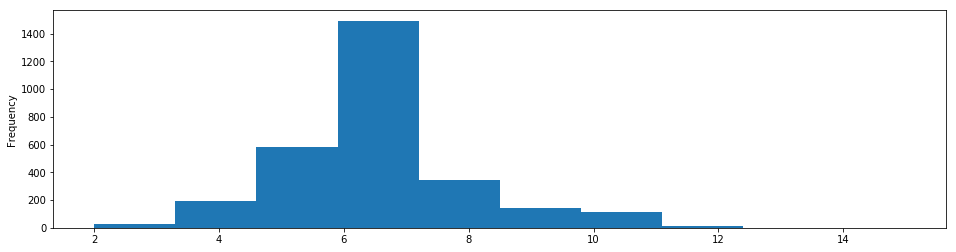

In [206]:
df['TotRmsAbvGrd'].plot(kind='hist', figsize=(16, 4))

In [207]:
cols.append('TotRmsAbvGrd')

### Functional
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [208]:
df['Functional'].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [209]:
df['FunctionalLvl'] = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3,
                                            'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal': 7}).fillna(-1)

In [210]:
cols.append('FunctionalLvl')

### Fireplaces
Number of fireplaces

In [211]:
df['Fireplaces'].describe()

count    2919.000000
mean        0.597122
std         0.646129
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64

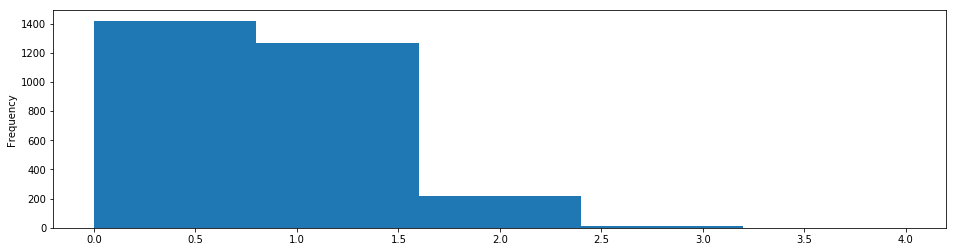

In [212]:
df['Fireplaces'].plot(kind='hist', bins=5, figsize=(16, 4))

In [213]:
cols.append('Fireplaces')

### FireplaceQu
Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		

In [214]:
df['FireplaceQu'].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

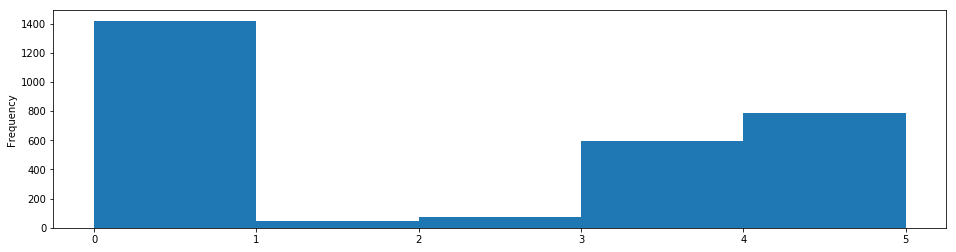

In [215]:
df['FireplaceQuLvl'] = df['FireplaceQu'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)
df['FireplaceQuLvl'].plot(kind='hist', bins=5, figsize=(16, 4))

In [216]:
cols.append('FireplaceQuLvl')

### GarageType
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		

In [217]:
df['GarageType'].value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [218]:
dummies = pd.get_dummies(df['GarageType'], prefix='GarageType')
df = pd.concat([df, dummies], axis=1)

In [220]:
cols += list(dummies.columns)

### GarageYrBlt
Year garage was built

In [221]:
df['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

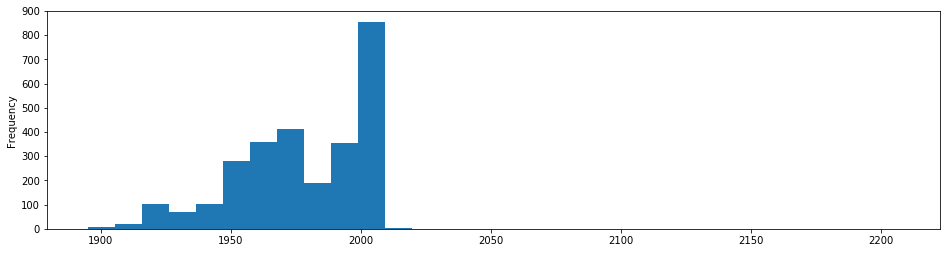

In [222]:
df['GarageYrBlt'].plot(kind='hist', bins=30, figsize=(16, 4))

In [224]:
df['GarageYrBlt_minmax'] = minmax_scale(df['GarageYrBlt'].fillna(0).astype(float))

In [225]:
cols.append('GarageYrBlt_minmax')

### GarageFinish
Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
	

In [226]:
df['GarageFinish'].value_counts(dropna=False)

Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64

In [227]:
df['GarageFinishLvl'] = df['GarageFinish'].map({'Unf':1, 'RFn':2, 'Fin':3}).fillna(0)

In [228]:
cols.append('GarageFinishLvl')

### GarageCars
Size of garage in car capacity

In [229]:
df['GarageCars'].value_counts(dropna=False)

 2.0    1594
 1.0     776
 3.0     374
 0.0     157
 4.0      16
NaN        1
 5.0       1
Name: GarageCars, dtype: int64

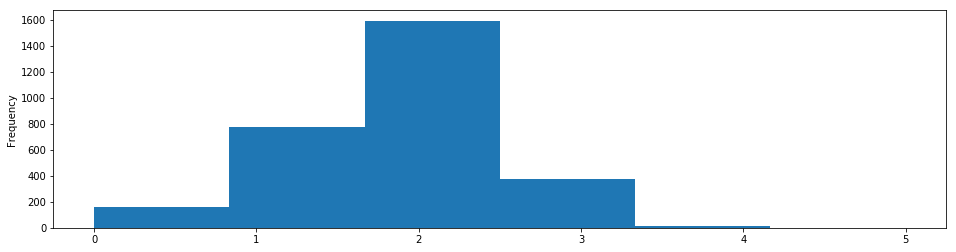

In [230]:
df['GarageCars'].plot(kind='hist', bins=6, figsize=(16, 4))

In [231]:
df['GarageCars_'] = df['GarageCars'].fillna(0)

In [232]:
cols.append('GarageCars_')

### GarageArea
Size of garage in square feet

In [233]:
df['GarageArea'].describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

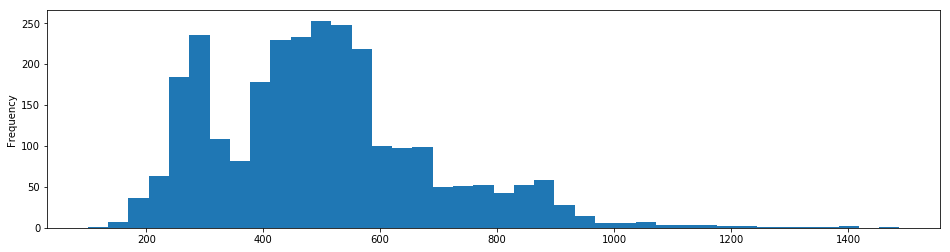

In [234]:
df['GarageAreaIgnr0'] = df['GarageArea'].apply(lambda x: x if x else np.nan)
df['GarageAreaIgnr0'].plot(kind='hist', bins=40, figsize=(16, 4))

In [237]:
df['GarageArea_minmax'] = minmax_scale(df['GarageArea'].fillna(0).astype(float))

In [238]:
cols.append('GarageArea_minmax')

### GarageQual
Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

In [239]:
df['GarageQual'].value_counts(dropna=False)

TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

In [240]:
df['GarageQualLvl'] = df['GarageQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)

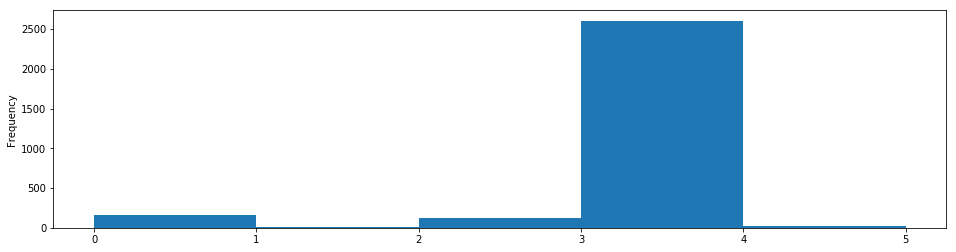

In [241]:
df['GarageQualLvl'].plot(kind='hist', bins=5, figsize=(16, 4))

In [242]:
cols.append('GarageQualLvl')

### GarageCond
Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

In [243]:
df['GarageCond'].value_counts(dropna=False)

TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

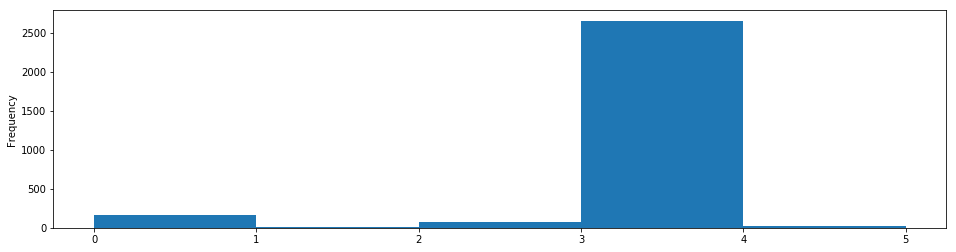

In [244]:
df['GarageCondLvl'] = df['GarageCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)
df['GarageCondLvl'].plot(kind='hist', bins=5, figsize=(16, 4))

In [245]:
cols.append('GarageCondLvl')

### PavedDrive
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		

In [246]:
df['PavedDrive'].value_counts(dropna=False)

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [247]:
df['PavedDriveLvl'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

In [248]:
cols.append('PavedDriveLvl')

### WoodDeckSF
Wood deck area in square feet

In [249]:
df['WoodDeckSF'].describe()

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

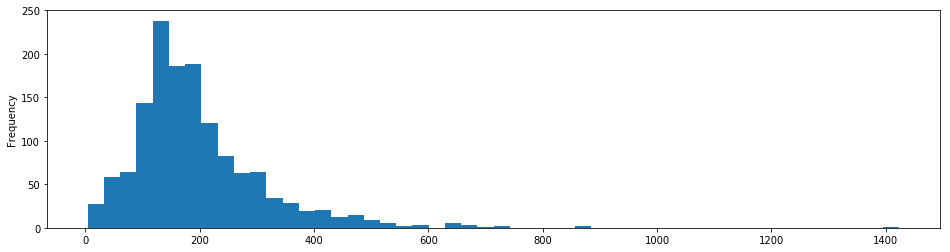

In [250]:
df['WoodDeckSFIgnr0'] = df['WoodDeckSF'].apply(lambda x: x if x else np.nan)
df['WoodDeckSFIgnr0'].plot(kind='hist', bins=50, figsize=(16, 4))

In [251]:
df['WoodDeckSF_minmax'] = minmax_scale(df['WoodDeckSF'].astype(float))

In [252]:
cols.append('WoodDeckSF_minmax')

### OpenPorchSF
Open porch area in square feet

In [253]:
df['OpenPorchSF'].describe()

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

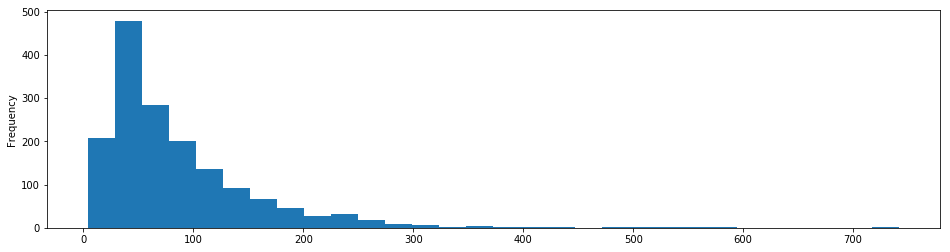

In [254]:
df['OpenPorchSFIgnr0'] = df['OpenPorchSF'].apply(lambda x: x if x else np.nan)
df['OpenPorchSFIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [255]:
df['OpenPorchSF_minmax'] = minmax_scale(df['OpenPorchSF'].astype(float))

In [256]:
cols.append('OpenPorchSF_minmax')

### EnclosedPorch
Enclosed porch area in square feet

In [257]:
df['EnclosedPorch'].describe()

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

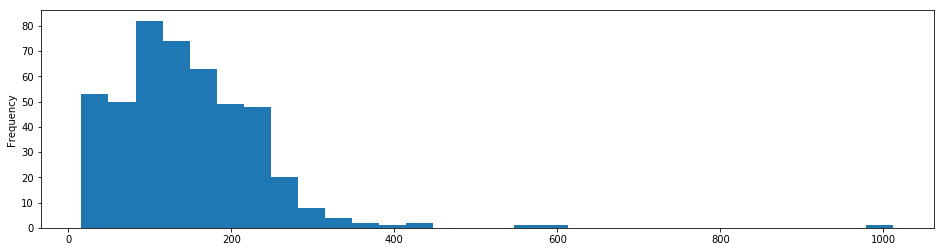

In [258]:
df['EnclosedPorchIgnr0'] = df['EnclosedPorch'].apply(lambda x: x if x else np.nan)
df['EnclosedPorchIgnr0'].plot(kind='hist', bins=30, figsize=(16,4))

In [304]:
df['EnclosedPorch_minmax'] = minmax_scale(df['EnclosedPorch'].astype(float))

In [260]:
cols.append('EnclosedPorch_minmax')

### 3SsnPorch
Three season porch area in square feet

In [261]:
df['3SsnPorch'].describe()

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

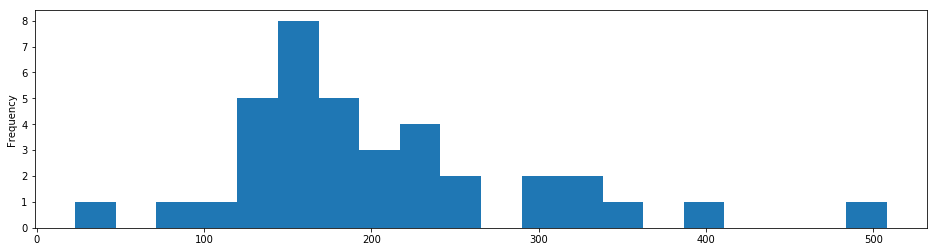

In [262]:
df['3SsnPorchIgnr0'] = df['3SsnPorch'].apply(lambda x: x if x else np.nan)
df['3SsnPorchIgnr0'].plot(kind='hist', bins=20, figsize=(16,4))

In [263]:
df['3SsnPorch_minmax'] = minmax_scale(df['3SsnPorch'].astype(float))

In [264]:
cols.append('3SsnPorch_minmax')

### ScreenPorch
Screen porch area in square feet

In [265]:
df['ScreenPorch'].describe()

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

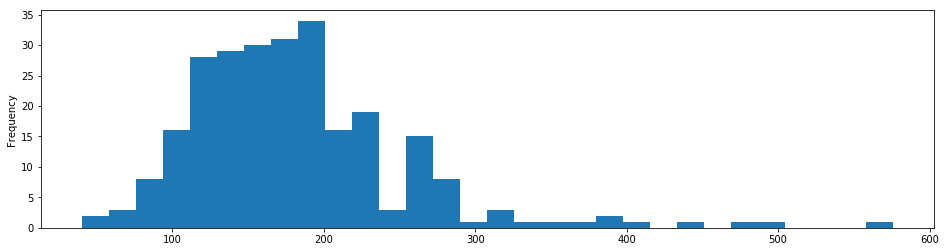

In [266]:
df['ScreenPorchIgnr0'] = df['ScreenPorch'].apply(lambda x: x if x else np.nan)
df['ScreenPorchIgnr0'].plot(kind='hist', bins=30, figsize=(16, 4))

In [267]:
df['ScreenPorch_minmax'] = minmax_scale(df['ScreenPorch'].astype(float))

In [268]:
cols.append('ScreenPorch_minmax')

### PoolArea
Pool area in square feet

In [269]:
df['PoolArea'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

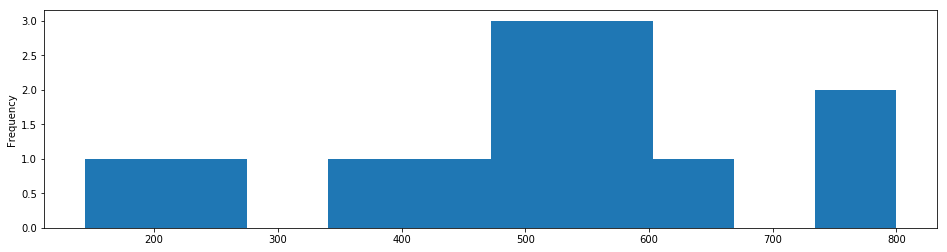

In [270]:
df['PoolAreaIgnr0'] = df['PoolArea'].apply(lambda x: x if x else np.nan)
df['PoolAreaIgnr0'].plot(kind='hist', bins=10, figsize=(16, 4))

In [271]:
df['PoolArea_minmax'] = minmax_scale(df['PoolArea'].astype(float))

In [272]:
cols.append('PoolArea_minmax')

### PoolQC
Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

In [273]:
df['PoolQC'].value_counts(dropna=False)

NaN    2909
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64

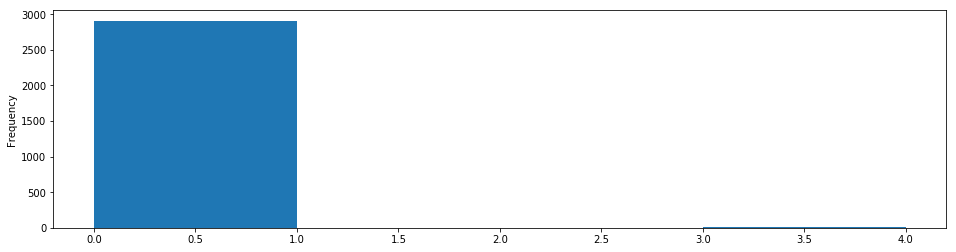

In [274]:
df['PoolQCLvl'] = df['PoolQC'].map({'Fa': 1, 'TA':2, 'Gd':3, 'Ex':4}).fillna(0)
df['PoolQCLvl'].plot(kind='hist', bins=4, figsize=(16, 4))

In [275]:
cols.append('PoolQCLvl')

### Fence
Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	

In [276]:
df['Fence'].value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

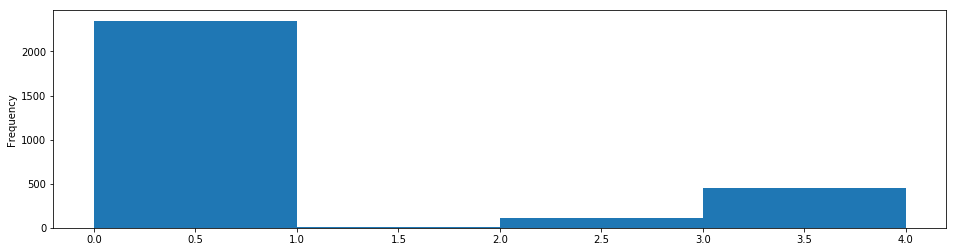

In [277]:
df['FenceLvl'] = df['Fence'].map({'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}).fillna(0)
df['FenceLvl'].plot(kind='hist', bins=4, figsize=(16, 4))

In [278]:
cols.append('FenceLvl')

### MiscFeature
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		

In [279]:
df['MiscFeature'].value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [280]:
dummies = pd.get_dummies(df['MiscFeature'], prefix='MiscFeature')
df = pd.concat([df, dummies], axis=1)

In [281]:
#cols += dummies.columns
cols + list(dummies.columns)

['MSSubClass_OneStory',
 'MSSubClass_OneHalfStory',
 'MSSubClass_TwoStory',
 'MSSubClass_TwoHalfStory',
 'MSSubClass_1945',
 'MSSubClass_1946',
 'MSSubClass_PUD',
 'MSSubClass_Duplex',
 'MSSubClass_Split',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotFrontage_minmax',
 'LotArea_minmax',
 'StreetPave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_minmax',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'UtilitiesNoSeWa',
 'UtilitiesNan',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_minmax',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWA

### MiscVal
$Value of miscellaneous feature

In [282]:
df['MiscVal'].describe()

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

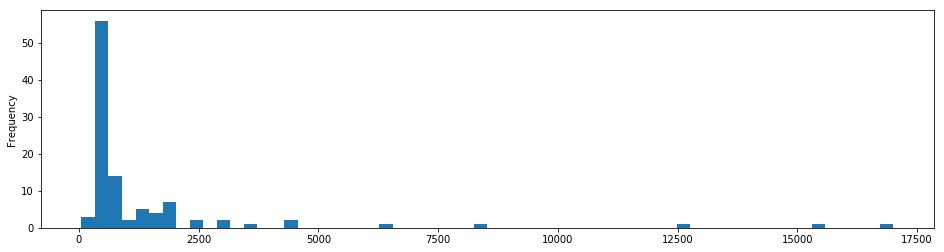

In [283]:
df['MiscValIgnr0'] = df['MiscVal'].apply(lambda x: x if x else np.nan)
df['MiscValIgnr0'].plot(kind='hist', bins=60, figsize=(16, 4))

In [284]:
df['MiscVal_minmax'] = minmax_scale(df['MiscVal'].astype(float))

In [285]:
cols.append('MiscVal_minmax')

### MoSold
Month Sold (MM)

In [286]:
df['MoSold'].value_counts(dropna=False)

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

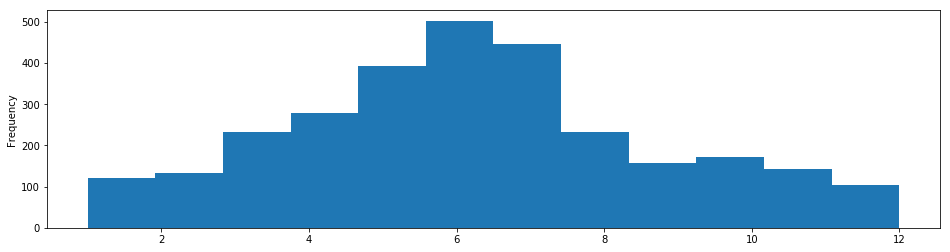

In [287]:
df['MoSold'].plot(kind='hist', bins=12, figsize=(16, 4))

In [288]:
dummies = pd.get_dummies(df['MoSold'], prefix='MoSold')
df = pd.concat([df, dummies], axis=1)

In [289]:
cols += list(dummies.columns)

### YrSold
Year Sold (YYYY)

In [290]:
df['YrSold'].describe()

count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

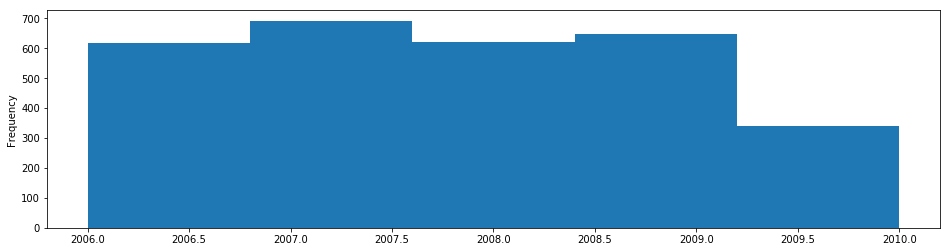

In [291]:
df['YrSold'].plot(kind='hist', bins=5, figsize=(16, 4))

In [292]:
dummies = pd.get_dummies(df['YrSold'], prefix='YrSold')
df = pd.concat([df, dummies], axis=1)

In [293]:
cols += list(dummies.columns)

### SaleType
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

In [294]:
df['SaleType'].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [295]:
dummies = pd.get_dummies(df['SaleType'], prefix='SaleType')
df = pd.concat([df, dummies], axis=1)

In [296]:
cols += list(dummies.columns)

### SaleCondition
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [297]:
df['SaleCondition'].value_counts(dropna=False)

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [298]:
dummies = pd.get_dummies(df['SaleCondition'], prefix='SaleCondition')
df = pd.concat([df, dummies], axis=1)

In [299]:
cols += list(dummies.columns)

### SalePrice

In [300]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

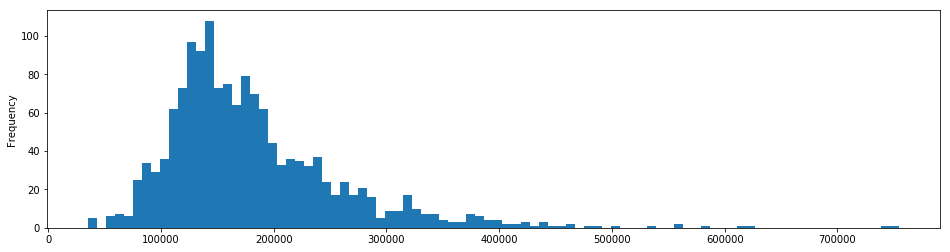

In [301]:
df['SalePrice'].plot(kind='hist', bins=90, figsize=(16, 4))

## Training Model

In [305]:
df[cols].isnull().values.any()

False

In [335]:
X_train = np.ascontiguousarray(df[df['SalePrice'].notnull()][cols].values, dtype=np.float32)
y_train = np.ascontiguousarray(df[df['SalePrice'].notnull()]['SalePrice'].values, dtype=np.float32)
X_test = np.ascontiguousarray(df[df['SalePrice'].isnull()][cols].values, dtype=np.float32)
idx_test = df[df['SalePrice'].isnull()].index

In [307]:
len(cols)

245

In [336]:
X_train.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [369]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [375]:
np.any(np.isnan(X_train)), np.any(np.isnan(y_train)), np.all(np.isfinite(X_train)), np.all(np.isfinite(y_train))

(False, False, True, True)

In [425]:
params = {'C':[1, 200, 4000, 8000], 'epsilon':[2, 40, 100, 200, 400], 'kernel':['linear']}
svr = SVR()
clf_svr = GridSearchCV(svr, params, cv=KFold(n_splits=20, shuffle=True, random_state=10),
                       scoring='neg_mean_squared_log_error', n_jobs=10)
clf_svr.fit(X_train, y_train)
print(clf_svr.best_params_)
print(clf_svr.best_score_)

{'C': 4000, 'epsilon': 200, 'kernel': 'linear'}
-0.02085806949258365


In [426]:
params = {'C':[0.1, 0.5, 1, 10]}
lor = LogisticRegression()
clf_lor = GridSearchCV(lor, params, cv=KFold(n_splits=20, shuffle=True, random_state=20),
                       scoring='neg_mean_squared_log_error', n_jobs=10)
clf_lor.fit(X_train, y_train)
print(clf_lor.best_params_)
print(clf_lor.best_score_)
#y_pred = lor.predict(X_train)
#mean_squared_error(np.log(y_train), np.log(y_pred))

{'C': 0.5}
-0.06453854255378247


In [428]:
params = {'n_estimators':[1000, 2000, 4000],
          'min_samples_split':range(3, 30, 3)}
rf = RandomForestRegressor()
clf_rf = GridSearchCV(rf, params, cv=KFold(n_splits=20, shuffle=True, random_state=30),
                      scoring='neg_mean_squared_log_error', n_jobs=10)
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)
print(clf_rf.best_score_)
#y_pred = rf.predict(X_train)
#mean_squared_error(np.log(y_train), np.log(y_pred))

{'min_samples_split': 3, 'n_estimators': 4000}
-0.020419844239901275


In [429]:
params = {'n_estimators':[4000, 8000, 12000],
          'learning_rate':[0.001, 0.01, 0.1],
          'max_features':['log2', 'sqrt', 0.5]}
gb = GradientBoostingRegressor()
clf_gb = GridSearchCV(gb, params, cv=KFold(n_splits=20, shuffle=True, random_state=40),
                      scoring='neg_mean_squared_log_error', n_jobs=10)
clf_gb.fit(X_train, y_train)
print(clf_gb.best_params_)
print(clf_gb.best_score_)
#gb.fit(X_train, y_train)
#y_pred = gb.predict(X_train)
#mean_squared_error(np.log(y_train), np.log(y_pred))

{'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 4000}
-0.015709507128382823


In [430]:
X2 = []
y2 = []
for train_index, test_index in KFold(n_splits=20, shuffle=True, random_state=20).split(X_train):
    y_predict = []
    for clf in [clf_svr, clf_lor, clf_rf, clf_gb]:
        clf.best_estimator_.fit(X_train[train_index], y_train[train_index])
        y_predict.append(clf.best_estimator_.predict(X_train[test_index]))
    X2.append(np.stack(y_predict, axis=-1))
    y2.append(y_train[test_index])
    print(X2[-1].shape, y2[-1].shape)
X2_train = np.concatenate(X2, axis=0)
y2_train = np.concatenate(y2, axis=0)
print(X2_train.shape, y2_train.shape)

(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(73, 4) (73,)
(1460, 4) (1460,)


In [431]:
mean_squared_error(np.log(X2_train.mean(axis=1)), np.log(y2_train))

0.01889298679031907

In [432]:
lir = LinearRegression()
scores = cross_val_score(lir, X2_train, y2_train,
                         scoring='neg_mean_squared_log_error', cv=KFold(n_splits=10, shuffle=True, random_state=10))
#kf = KFold(n_splits=10, shuffle=True, random_state=10)
#for train_index, test_index in kf.split(X2_train):
#    lir.fit(X2_train[train_index], y2_train[train_index])
    #y_pred = np.clip(lir.predict(X2_train[test_index]), 1, None)
#    print(mean_squared_error(np.log(y_train[test_index]), np.log(y_pred)))
print(scores)
lir.fit(X2_train, y2_train)

[-0.01657181 -0.0164617  -0.01817653 -0.00759816 -0.01566484 -0.01106599
 -0.01399338 -0.01164846 -0.01739697 -0.02198978]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [433]:
y_predict = []
for clf in [clf_svr, clf_lor, clf_rf, clf_gb]:
    clf.best_estimator_.fit(X_train, y_train)
    y_predict.append(clf.best_estimator_.predict(X_test))
X2_test = np.stack(y_predict, axis=-1)
print(X2_test.shape)
y_test = lir.predict(X2_test)
print(y_test.shape)

(1459, 4)
(1459,)


In [434]:
df_submit = pd.DataFrame(idx_test, columns=['Id'])
df_submit['SalePrice'] = y_test.astype(int)
df_submit.to_csv('projects/kaggle/house_prices/submit.csv', index=False)